In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import files
# import io
# uploaded = files.upload()

# **IMPORT DATA**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

# df = pd.read_csv(io.BytesIO(uploaded['laborrel.csv']))
df_train = pd.read_csv('gdrive/My Drive/Colab Notebooks/train.csv', sep='|')
df_test = pd.read_csv('gdrive/My Drive/Colab Notebooks/test.csv', sep='|')

Mounted at /content/gdrive


In [ ]:
df_train

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
...,...,...,...,...,...,...,...,...,...,...
1874,1,321,76.03,8,7,2,0.071651,0.236854,0.347826,0
1875,1,397,41.89,5,5,0,0.065491,0.105516,0.192308,1
1876,4,316,41.83,5,8,1,0.094937,0.132373,0.166667,0
1877,2,685,62.68,1,6,2,0.035036,0.091504,0.041667,0


In [ ]:
df_test

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526
...,...,...,...,...,...,...,...,...,...
498116,4,783,59.10,2,2,0,0.012771,0.075479,0.200000
498117,1,278,98.90,9,5,4,0.050360,0.355755,0.642857
498118,3,300,5.41,6,6,4,0.030000,0.018033,0.666667
498119,2,1524,33.97,2,5,3,0.005906,0.022290,0.222222


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModifications      498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 34.2 MB


Sebelum melakukan klasifikasi, lebih baik mengetahui dengan baik data yang digunakan dan karakteristik dari atribut yang ada pada dataset yang digunakan


*   Trust Level : customer trust level ada pada rentang 1-6
*   Total Scanned Time in Sec : total item scanned dalam detik antara produk saat pertama di scan dan terakhir kali di scan
*   Grand Total : total produk yang telah di scann
*   Line Item Voids : nomor produk yang batal di scan
*   Scans without registration : Terhitung melakukan scan padahal tidak melakukan scan
*   Quantitiy Modifications : Jumlah kuantitas yang dimodivikasi
*   Scanned Line item per seconds : jumlah rata-rata produk yang discan (total item/totalscantimeinseconds)
*   Value per second : total rata-rata nilai per detik (grandtotal/totalscantimeinseconds)
*   Line item void per second : Rata-rata jumlah item kosong per total semua produk yang dipindai dan tidak dibatalkan (lineitemvoids/totalitem)
*   Fraud : label yang akan digunakan sebagai klasifikasi


Tambahan
*   total item : totalscantimeinseconds*Scanned Line item per seconds
*   weird actions: Line Item Voids+Scans without registration+Quantitiy Modifications

# **DATA PREPROCESSING**

cek missing value

In [ ]:
#mengetahui missing values
print(df_train.isna().values.sum())
print(df_train.isna().sum())
print("\n")
print(df_test.isna().values.sum())
print(df_test.isna().sum())

0
trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64


0
trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
dtype: int64


cek duplikat

In [ ]:
# Find a duplicate rows
print(df_train[df_train.duplicated()])

print(df_test[df_test.duplicated()])

Empty DataFrame
Columns: [trustLevel, totalScanTimeInSeconds, grandTotal, lineItemVoids, scansWithoutRegistration, quantityModifications, scannedLineItemsPerSecond, valuePerSecond, lineItemVoidsPerPosition, fraud]
Index: []
Empty DataFrame
Columns: [trustLevel, totalScanTimeInSeconds, grandTotal, lineItemVoids, scansWithoutRegistration, quantityModifications, scannedLineItemsPerSecond, valuePerSecond, lineItemVoidsPerPosition]
Index: []


add new feature

In [ ]:
df_train['total_items'] = (df_train['totalScanTimeInSeconds'] * df_train['scannedLineItemsPerSecond']).astype('int64')
df_train['weird_actions'] = (df_train['lineItemVoids'] + df_train['scansWithoutRegistration'] + df_train['quantityModifications']).astype('int64')
df_train.head(5)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,total_items,weird_actions
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,28,10
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,14,11
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,13,18
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,29,16
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,26,12


In [ ]:
df_test['total_items'] = (df_test['totalScanTimeInSeconds'] * df_test['scannedLineItemsPerSecond']).astype('int64')
df_test['weird_actions'] = (df_test['lineItemVoids'] + df_test['scansWithoutRegistration'] + df_test['quantityModifications']).astype('int64')
df_test.head(5)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,total_items,weird_actions
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,7,16
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,27,14
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,1,13
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,13,16
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,19,4


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set()
sns.pairplot(df_train)
plt.show();

cek outlier

<Figure size 15000x15000 with 0 Axes>

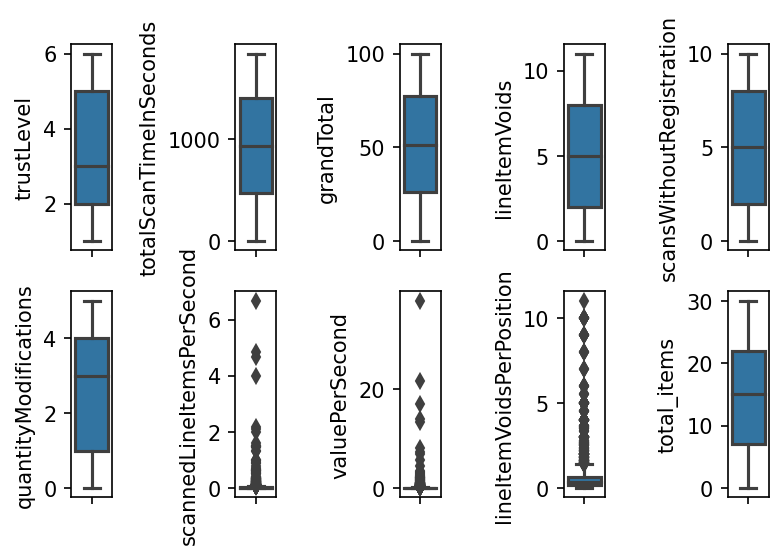

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(100, 100))
f, axes = plt.subplots(2, 5)
sns.boxplot(y=df_train["trustLevel"], ax=axes[0,0])
sns.boxplot(y=df_train["totalScanTimeInSeconds"], ax=axes[0,1])
sns.boxplot(y=df_train["grandTotal"], ax=axes[0,2])
sns.boxplot(y=df_train["lineItemVoids"], ax=axes[0,3])
sns.boxplot(y=df_train["scansWithoutRegistration"], ax=axes[0,4])
sns.boxplot(y=df_train["quantityModifications"], ax=axes[1,0])
sns.boxplot(y=df_train["scannedLineItemsPerSecond"], ax=axes[1,1])
sns.boxplot(y=df_train["valuePerSecond"], ax=axes[1,2])
sns.boxplot(y=df_train["lineItemVoidsPerPosition"], ax=axes[1,3])
sns.boxplot(y=df_train["total_items"], ax=axes[1,4])
# sns.boxplot(y=df_train["weird_actions"], ax=axes[1,4])

plt.subplots_adjust(wspace=3)

In [ ]:
# Q1 = df_train.loc[:, df_train.columns != 'fraud'].quantile(0.25)

Q1 = df_train.iloc[:, 6:9].quantile(0.25)
Q3 = df_train.iloc[:, 6:9].quantile(0.75)
IQR = Q3 - Q1

print("Q1: \n", Q1)
print("\n Q3: \n", Q3)
print("\n IQR: \n", IQR)

Q1: 
 scannedLineItemsPerSecond    0.008384
valuePerSecond               0.027787
lineItemVoidsPerPosition     0.160000
Name: 0.25, dtype: float64

 Q3: 
 scannedLineItemsPerSecond    0.032594
valuePerSecond               0.107313
lineItemVoidsPerPosition     0.666667
Name: 0.75, dtype: float64

 IQR: 
 scannedLineItemsPerSecond    0.024210
valuePerSecond               0.079527
lineItemVoidsPerPosition     0.506667
dtype: float64


In [ ]:
df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train.shape

(1393, 12)

<Figure size 15000x15000 with 0 Axes>

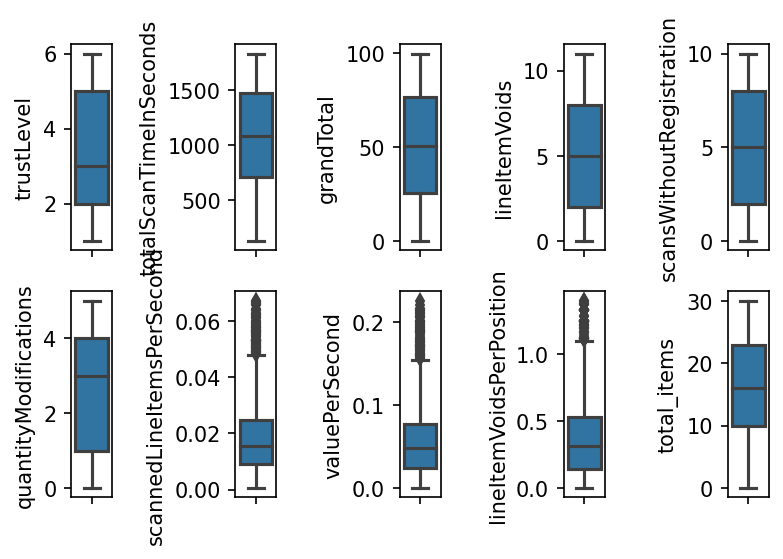

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(100, 100))
f, axes = plt.subplots(2, 5)
sns.boxplot(y=df_train["trustLevel"], ax=axes[0,0])
sns.boxplot(y=df_train["totalScanTimeInSeconds"], ax=axes[0,1])
sns.boxplot(y=df_train["grandTotal"], ax=axes[0,2])
sns.boxplot(y=df_train["lineItemVoids"], ax=axes[0,3])
sns.boxplot(y=df_train["scansWithoutRegistration"], ax=axes[0,4])
sns.boxplot(y=df_train["quantityModifications"], ax=axes[1,0])
sns.boxplot(y=df_train["scannedLineItemsPerSecond"], ax=axes[1,1])
sns.boxplot(y=df_train["valuePerSecond"], ax=axes[1,2])
sns.boxplot(y=df_train["lineItemVoidsPerPosition"], ax=axes[1,3])
sns.boxplot(y=df_train["total_items"], ax=axes[1,4])
# sns.boxplot(y=df_train["weird_actions"], ax=axes[1,4])

plt.subplots_adjust(wspace=3)

heatmap correlation

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text major ticklabel objects>)

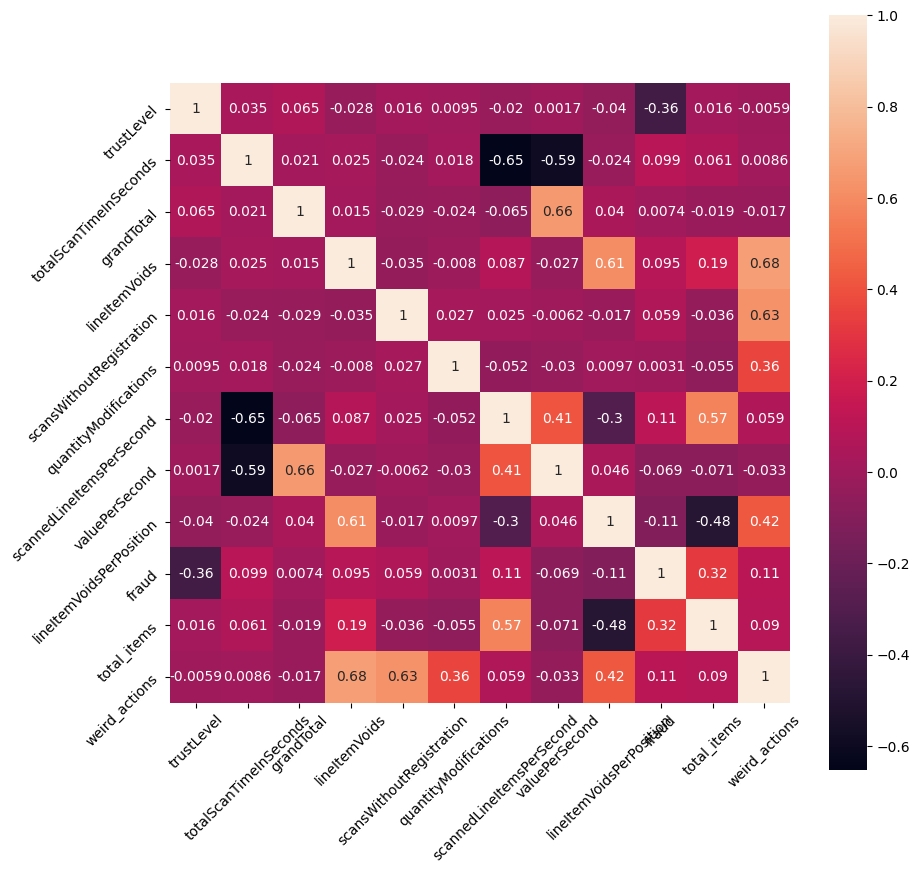

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 100
corr = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True, annot=True)
# ax.set_xticklabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [ ]:
print(corr['fraud'].sort_values(ascending=False))

fraud                        1.000000
total_items                  0.320450
scannedLineItemsPerSecond    0.109283
weird_actions                0.106078
totalScanTimeInSeconds       0.099417
lineItemVoids                0.095411
scansWithoutRegistration     0.059278
grandTotal                   0.007417
quantityModifications        0.003124
valuePerSecond              -0.069416
lineItemVoidsPerPosition    -0.109265
trustLevel                  -0.357581
Name: fraud, dtype: float64


In [ ]:
print(corr['total_items'].sort_values(ascending=False))

total_items                  1.000000
scannedLineItemsPerSecond    0.571939
fraud                        0.320450
lineItemVoids                0.188572
weird_actions                0.090206
totalScanTimeInSeconds       0.061033
trustLevel                   0.015944
grandTotal                  -0.018559
scansWithoutRegistration    -0.035902
quantityModifications       -0.054664
valuePerSecond              -0.070731
lineItemVoidsPerPosition    -0.482816
Name: total_items, dtype: float64


In [ ]:
print(corr['scannedLineItemsPerSecond'].sort_values(ascending=False))

scannedLineItemsPerSecond    1.000000
total_items                  0.571939
valuePerSecond               0.410065
fraud                        0.109283
lineItemVoids                0.087423
weird_actions                0.059309
scansWithoutRegistration     0.024684
trustLevel                  -0.020201
quantityModifications       -0.051839
grandTotal                  -0.064865
lineItemVoidsPerPosition    -0.299445
totalScanTimeInSeconds      -0.652970
Name: scannedLineItemsPerSecond, dtype: float64


**Trust level - closer look**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


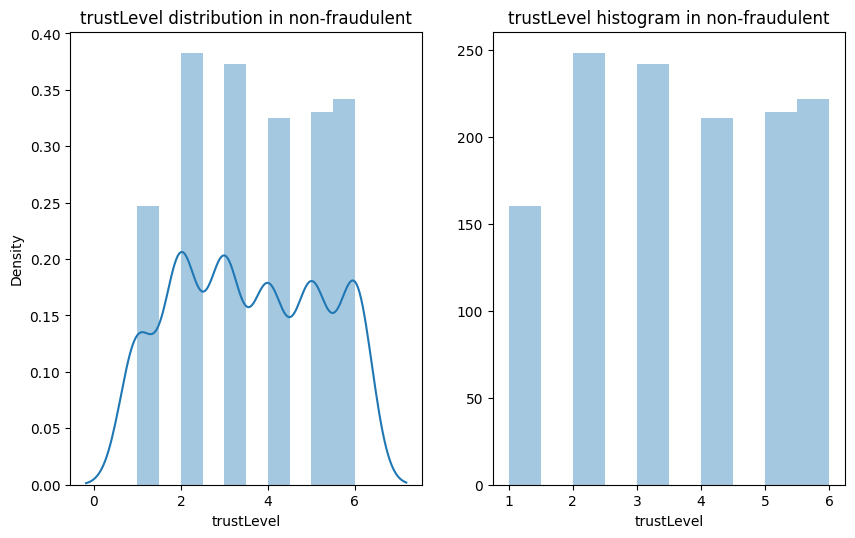

In [ ]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("trustLevel distribution in non-fraudulent")
ax2.set_title("trustLevel histogram in non-fraudulent")
sns.distplot(df_train[df_train['fraud']==0].trustLevel, kde=True, ax=ax1)
sns.distplot(df_train[df_train['fraud']==0].trustLevel, kde=False, ax=ax2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


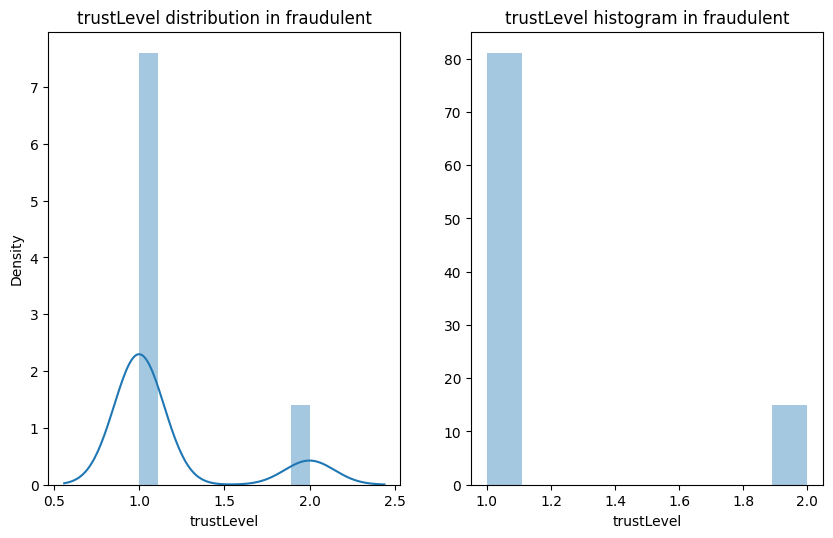

In [ ]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("trustLevel distribution in fraudulent")
ax2.set_title("trustLevel histogram in fraudulent")
sns.distplot(df_train[df_train['fraud']==1].trustLevel, kde=True, ax=ax1)
sns.distplot(df_train[df_train['fraud']==1].trustLevel, kde=False, ax=ax2)

In [ ]:
print(df_train[df_train['fraud']==1].trustLevel.unique())

print(df_train[df_train['fraud']==0].trustLevel.unique())

[1 2]
[5 3 6 2 4 1]


# **IMBALANCED DATA**

Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


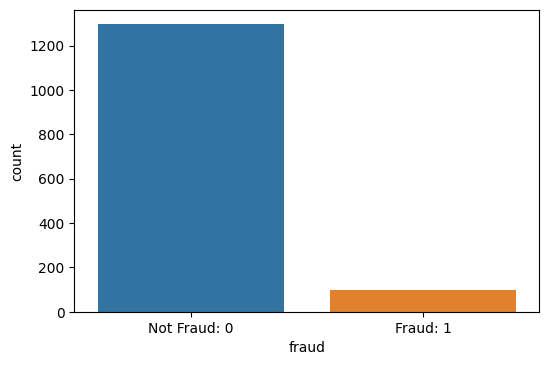

In [ ]:
#imbalanced data
g = sns.countplot(df_train['fraud'])
g.set_xticklabels(['Not Fraud: 0','Fraud: 1'])
plt.show()

In [ ]:
cases = len(df_train)
nonfraud_count = len(df_train[df_train.fraud == 0])
fraud_count = len(df_train[df_train.fraud == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print('CASE COUNT')
print('--------------------------------------------')
print('Total number of cases are:', cases)
print('Number of Non-fraud cases are:', nonfraud_count)
print('Number of Fraud cases are:', fraud_count)
print('Percentage of fraud cases is:', fraud_percentage)
# print('--------------------------------------------')

CASE COUNT
--------------------------------------------
Total number of cases are: 1393
Number of Non-fraud cases are: 1297
Number of Fraud cases are: 96
Percentage of fraud cases is: 7.4


**CHECK IMBALANCED DATA USING LR**

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing

# Separate input features (X) and target variable (y)
x_train = df_train.drop('fraud', axis = 1)
y_train = df_train.fraud

#Data split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1114, 11)
(1114,)
(279, 11)
(279,)


In [ ]:
# scaling digunakan untuk scalling data karena adanya perbedaan rentang data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Train model
clf = LogisticRegression().fit(x_train, y_train)
 
# Predict on training set
y_pred = clf.predict(x_test)


print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Clasification Report: \n', classification_report(y_test, y_pred))
print('\n Accuracy Score:', accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[260   0]
 [  5  14]]

 Clasification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       260
           1       1.00      0.74      0.85        19

    accuracy                           0.98       279
   macro avg       0.99      0.87      0.92       279
weighted avg       0.98      0.98      0.98       279


 Accuracy Score: 0.982078853046595


# **MODELING**

**DATA SPLITTING & SCALING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Separate input features (X) and target variable (y)
x_train = df_train.drop('fraud', axis = 1)
y_train = df_train.fraud

x_test = df_test
y_test = pd.read_csv('gdrive/My Drive/Colab Notebooks/DMC-2019-realclass.csv', sep="|")

In [ ]:
# scaler digunakan untuk scalling data karena adanya perbedaan rentang data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**USING SMOTE+TOMEK LINKS**

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter

# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=42)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)


counter = Counter(y_train)
print('Before',counter)

counter = Counter(y_train_smtom)
print('After',counter)

# print(x_train_smtom)

Before Counter({0: 1297, 1: 96})
After Counter({0: 1297, 1: 1297})


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
print("x Train:" ,x_train_smtom.shape)
print("y Train:" ,y_train_smtom.shape)
print("x Test:" ,x_test.shape)
print("y Test:" ,y_test.shape)

x Train: (2594, 11)
y Train: (2594,)
x Test: (498121, 11)
y Test: (498121, 1)


# **PREDICTION & EVALUATION**

**XGBOOST**

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train_smtom, y_train_smtom)

# predicting class
y_pred_xgb = xgb_model.predict(x_test)

print(y_pred_xgb)

[0 0 0 ... 0 0 0]


In [ ]:
cnf_mtr_xgb = confusion_matrix(y_test, y_pred_xgb)
clss_rpt_xgb = classification_report(y_test, y_pred_xgb)
acc_score_xgb = accuracy_score(y_test, y_pred_xgb)


print('Confusion Matrix: \n', cnf_mtr_xgb)
print('\n Clasification Report: \n', clss_rpt_xgb)
print('\n Accuracy Score:', acc_score_xgb)

Confusion Matrix: 
 [[467247   7147]
 [  2052  21675]]

 Clasification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    474394
           1       0.75      0.91      0.82     23727

    accuracy                           0.98    498121
   macro avg       0.87      0.95      0.91    498121
weighted avg       0.98      0.98      0.98    498121


 Accuracy Score: 0.9815325995089547


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(x_train_smtom, y_train_smtom)

# predicting class
y_pred_dt = dt_model.predict(x_test)

print(y_pred_dt)

[0 0 0 ... 0 0 0]


In [ ]:
cnf_mtr_dt = confusion_matrix(y_test, y_pred_dt)
clss_rpt_dt = classification_report(y_test, y_pred_dt)
acc_score_dt = accuracy_score(y_test, y_pred_dt)


print('Confusion Matrix: \n', cnf_mtr_dt)
print('\n Clasification Report: \n', clss_rpt_dt)
print('\n Accuracy Score:', acc_score_dt)

Confusion Matrix: 
 [[465878   8516]
 [  4318  19409]]

 Clasification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    474394
           1       0.70      0.82      0.75     23727

    accuracy                           0.97    498121
   macro avg       0.84      0.90      0.87    498121
weighted avg       0.98      0.97      0.98    498121


 Accuracy Score: 0.9742351757906211


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(x_train_smtom, y_train_smtom)

# predicting class
y_pred_rf = rf_model.predict(x_test)

print(y_pred_rf)

[0 0 0 ... 0 0 0]


In [ ]:
cnf_mtr_rf = confusion_matrix(y_test, y_pred_rf)
clss_rpt_rf = classification_report(y_test, y_pred_rf)
acc_score_rf = accuracy_score(y_test, y_pred_rf)


print('Confusion Matrix: \n', cnf_mtr_rf)
print('\n Clasification Report: \n', clss_rpt_rf)
print('\n Accuracy Score:', acc_score_rf)

Confusion Matrix: 
 [[469002   5392]
 [  4686  19041]]

 Clasification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    474394
           1       0.78      0.80      0.79     23727

    accuracy                           0.98    498121
   macro avg       0.88      0.90      0.89    498121
weighted avg       0.98      0.98      0.98    498121


 Accuracy Score: 0.9797679680238336


In [ ]:
print('Accuracy untuk Decision Tree         : ',acc_score_dt)
print('Accuracy untuk Random Forest         : ',acc_score_rf)
print('Accuracy untuk XGBoost               : ',acc_score_xgb)

Accuracy untuk Decision Tree         :  0.9742351757906211
Accuracy untuk Random Forest         :  0.9797679680238336
Accuracy untuk XGBoost               :  0.9815325995089547


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train model
lr_model = LogisticRegression().fit(x_train_smtom, y_train_smtom)
 
# Predict on training set
y_pred_lr = lr_model.predict(x_test)

print(y_pred_lr)

[0 0 0 ... 0 0 0]


In [ ]:
cnf_mtr_lr = confusion_matrix(y_test, y_pred_lr)
clss_rpt_lr = classification_report(y_test, y_pred_lr)
acc_score_lr = accuracy_score(y_test, y_pred_lr)


print('Confusion Matrix: \n', cnf_mtr_lr)
print('\n Clasification Report: \n', clss_rpt_lr)
print('\n Accuracy Score:', acc_score_lr)

Confusion Matrix: 
 [[463408  10986]
 [   776  22951]]

 Clasification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    474394
           1       0.68      0.97      0.80     23727

    accuracy                           0.98    498121
   macro avg       0.84      0.97      0.89    498121
weighted avg       0.98      0.98      0.98    498121


 Accuracy Score: 0.9763872633356152


In [ ]:
print('Accuracy untuk Decision Tree         : ',acc_score_dt)
print('Accuracy untuk Random Forest         : ',acc_score_rf)
print('Accuracy untuk XGBoost               : ',acc_score_xgb)

print('Accuracy untuk Logistic Regression   : ',acc_score_lr)

Accuracy untuk Decision Tree         :  0.9742351757906211
Accuracy untuk Random Forest         :  0.9797679680238336
Accuracy untuk XGBoost               :  0.9815325995089547
Accuracy untuk Logistic Regression   :  0.9763872633356152


In [ ]:
import numpy as np

np.savetxt("hasilPrediksiFraud.csv", y_pred_xgb, delimiter=",")

In [ ]:
# from google.colab import files
# files.download("hasilPrediksiFraud.csv")

In [ ]:
# feature_names = ['total_items', 'scannedLineItemsPerSecond', 'weird_actions', 'totalScanTimeInSeconds', 'lineItemVoids', 'scansWithoutRegistration', 'grandTotal', 'quantityModifications', 'valuePerSecond']
# x_train = df_train[feature_names]
# y_train = df_train['fraud']